<a href="https://colab.research.google.com/github/Feyza2434/e-commerce-app/blob/main/karma%C5%9F%C4%B1k_a%C4%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
edges=pd.read_csv("InputFileEdges.csv")
nodes=pd.read_csv("InputFileNodes.csv")

In [ ]:
nodes["id"]=nodes["id"]
edges["from"]=edges["from"]
edges["to"]=edges["to"]

In [ ]:
edges=edges.drop_duplicates()

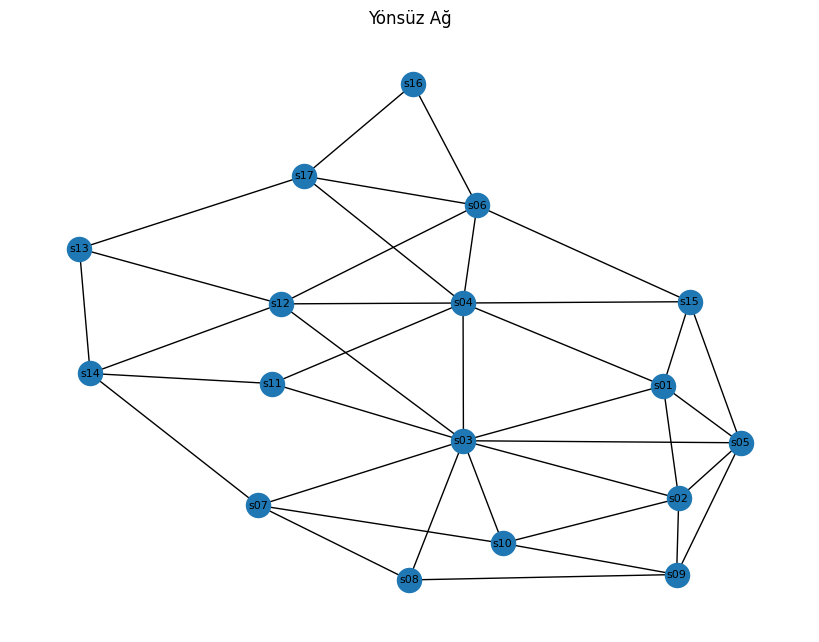

In [ ]:
G=nx.Graph()
G.add_edges_from(edges[["from","to"]].itertuples(index=False,name=None))

plt.figure(figsize=(8,6))
nx.draw(G,with_labels=True, node_size=300, font_size=8)
plt.title("Yönsüz Ağ")
plt.show()

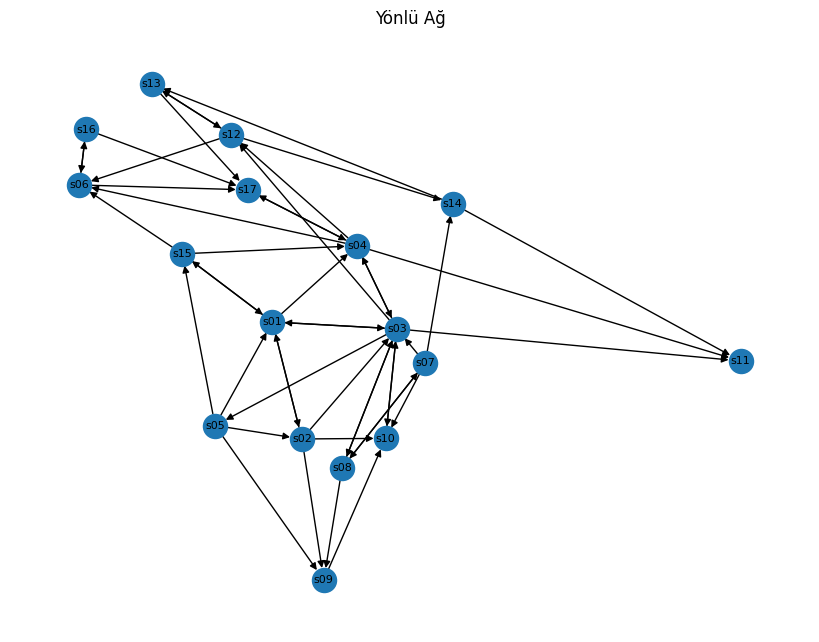

In [ ]:
G_directed=nx.DiGraph()
G_directed.add_edges_from(edges[["from", "to"]].itertuples(index=False, name=None))

plt.figure(figsize=(8, 6))
nx.draw(G_directed, with_labels=True, node_size=300, font_size=8, arrows=True)
plt.title("Yönlü Ağ")
plt.show()

In [ ]:
toplam=0
for node_name in G.nodes():
  print(f"{node_name} düğümün derecesi: {G.degree(node_name)}")
  toplam+=G.degree(node_name)
print(f"Ortalama : {toplam/len(nodes)}")

s01 düğümün derecesi: 5
s02 düğümün derecesi: 5
s03 düğümün derecesi: 9
s04 düğümün derecesi: 7
s11 düğümün derecesi: 3
s05 düğümün derecesi: 5
s15 düğümün derecesi: 4
s06 düğümün derecesi: 5
s17 düğümün derecesi: 4
s08 düğümün derecesi: 3
s09 düğümün derecesi: 4
s16 düğümün derecesi: 2
s10 düğümün derecesi: 4
s07 düğümün derecesi: 4
s12 düğümün derecesi: 5
s13 düğümün derecesi: 3
s14 düğümün derecesi: 4
Ortalama : 4.470588235294118


(array([1., 3., 6., 0., 5., 0., 0., 1., 0., 1.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <BarContainer object of 10 artists>)

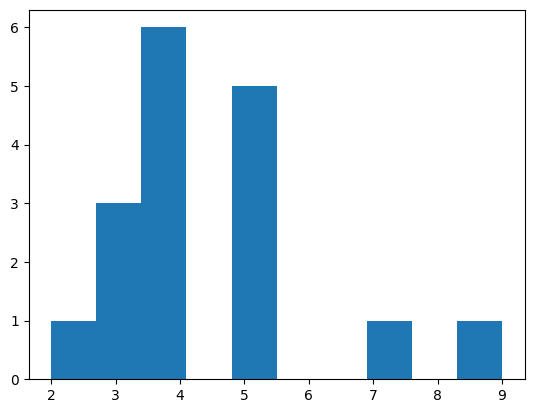

In [ ]:
plt.hist([G.degree(n) for n in G.nodes()])

In [ ]:
deg_centrality = nx.degree_centrality(G)

In [ ]:
closeness_centrality=nx.closeness_centrality(G)

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [ ]:
katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=1.0)

In [ ]:
pagerank_centrality = nx.pagerank(G)

In [ ]:
from networkx .algorithms.community import greedy_modularity_communities
communities=greedy_modularity_communities(G)
modularity=nx.algorithms.community.quality.modularity(G,communities)
print("Modularity:",modularity)

Modularity: 0.3244459833795013


In [ ]:
density = nx.density(G)
print("Density",density)

Density 0.27941176470588236


In [ ]:
avg_clustering = nx.average_clustering(G)
print("Average clustering:", avg_clustering)

Average clustering: 0.4205882352941176


In [ ]:
if nx.is_connected(G):
  diameter=nx.diameter(G)
else:
  diameter="Graf bağlantılı değil"
print("Diameter:",diameter)

Diameter: 4


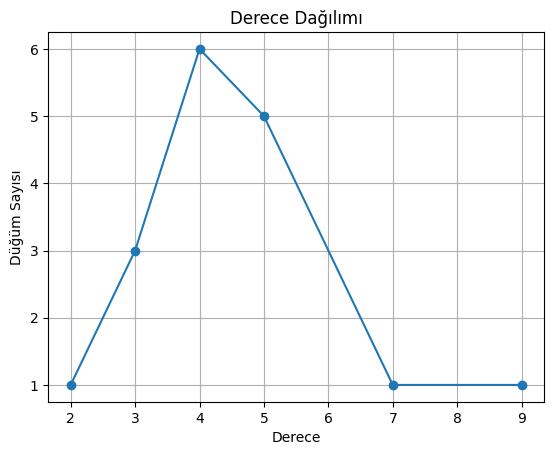

In [ ]:
degrees = [d for n, d in G.degree()]
degree_values = sorted(set(degrees))
degree_counts = [degrees.count(x) for x in degree_values]
plt.figure()
plt.plot(degree_values, degree_counts, marker="o")
plt.title("Derece Dağılımı")
plt.xlabel("Derece")
plt.ylabel("Düğüm Sayısı")
plt.grid(True)
plt.show()

In [ ]:
kritik_kopru=sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[:5]
print("En kritik 5 Köprü:",kritik_kopru)

En kritik 5 Köprü: [('s03', 0.3404166666666667), ('s04', 0.19566468253968253), ('s12', 0.12271825396825396), ('s06', 0.10018849206349206), ('s05', 0.0654563492063492)]


In [ ]:
kritik_lider=sorted(pagerank_centrality.items(),key=lambda x:x[1],reverse=True)[:5]
print("En kritik 5 Lider:",kritik_lider)

En kritik 5 Lider: [('s03', 0.10859250508679345), ('s04', 0.0871762112121626), ('s06', 0.0675150817299408), ('s12', 0.06538770928759405), ('s02', 0.06272260072993852)]


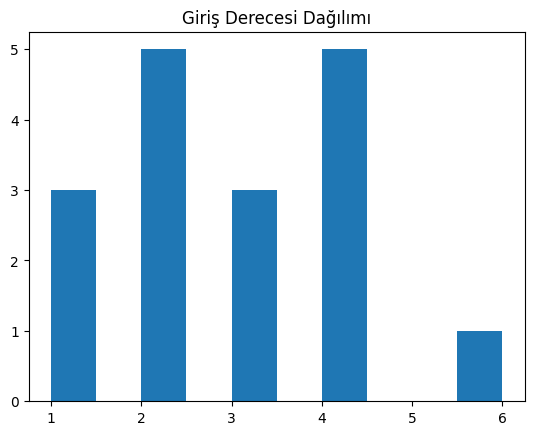

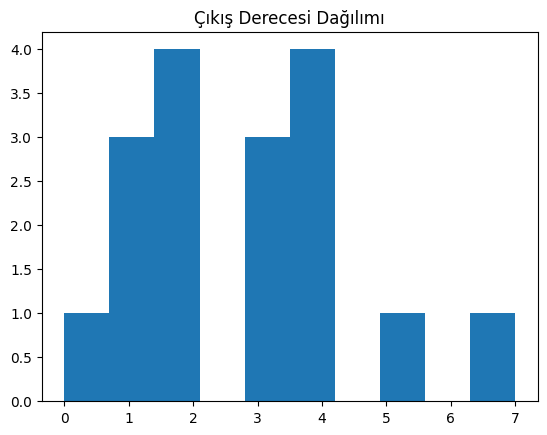

In [ ]:
in_degrees=dict(G_directed.in_degree())
out_degrees=dict(G_directed.out_degree())

plt.figure()
plt.hist(list(in_degrees.values()))
plt.title("Giriş Derecesi Dağılımı")
plt.show()

plt.figure()
plt.hist(list(out_degrees.values()))
plt.title("Çıkış Derecesi Dağılımı")
plt.show()

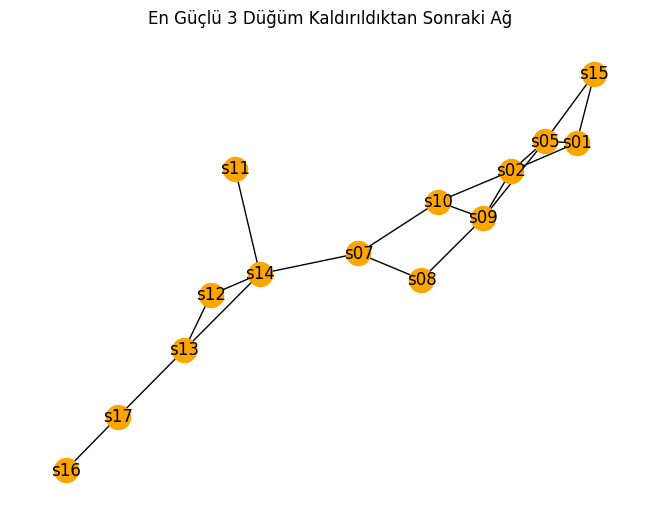

Kaldırılan düğümler: ['s03', 's04', 's06']


In [ ]:
son=sorted(pagerank_centrality.items(),key=lambda x:x[1],reverse=True)[:3]
son_nodes=[x[0] for x in son]

G2=G.copy()
G2.remove_nodes_from(son_nodes)
plt.figure()
nx.draw(G2,with_labels=True,node_color='orange')
plt.title("En Güçlü 3 Düğüm Kaldırıldıktan Sonraki Ağ")
plt.show()

print("Kaldırılan düğümler:", son_nodes)